**Analisis Grafico para los insights mas relevantes**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Cargar el archivo Excel
excel_path = "../data/proccessed/df_siniestros_limpio.xlsx"
df_siniestros = pd.read_excel(excel_path, sheet_name="Sheet1")

In [12]:
#Ver estilos disponibles
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


INICIANDO ANÁLISIS DE SINIESTROS
ANÁLISIS TEMPORAL DE SINIESTROS


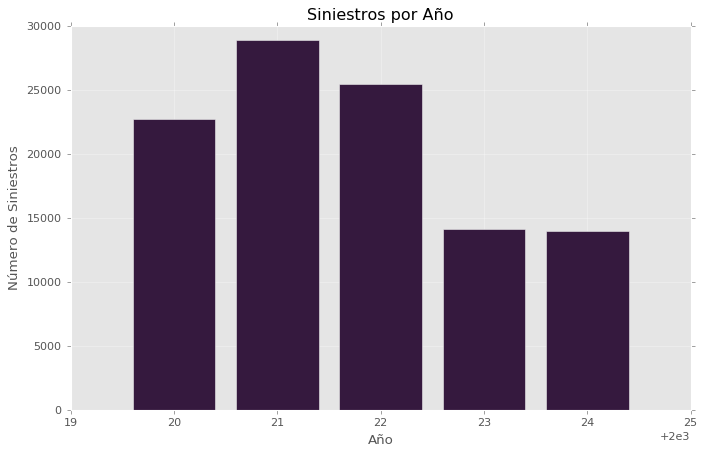

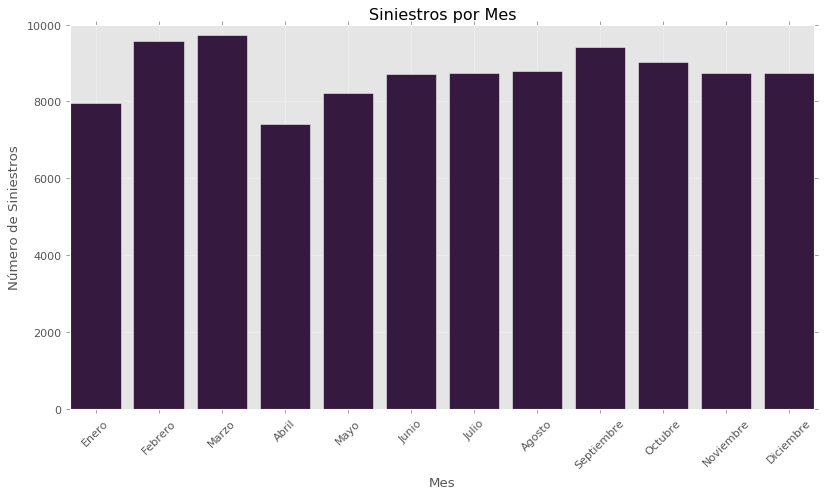

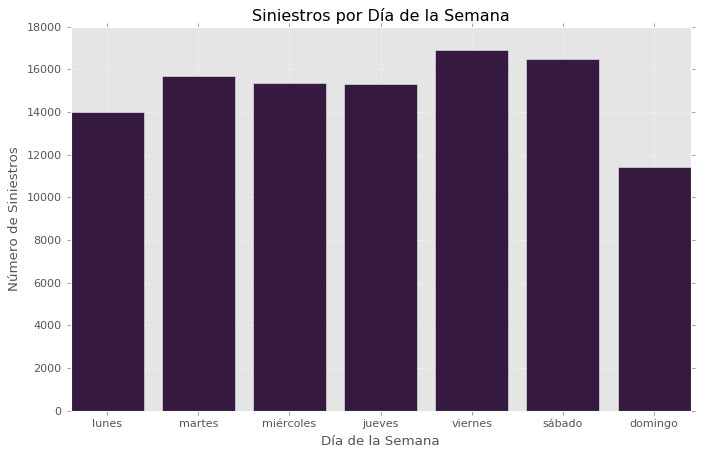

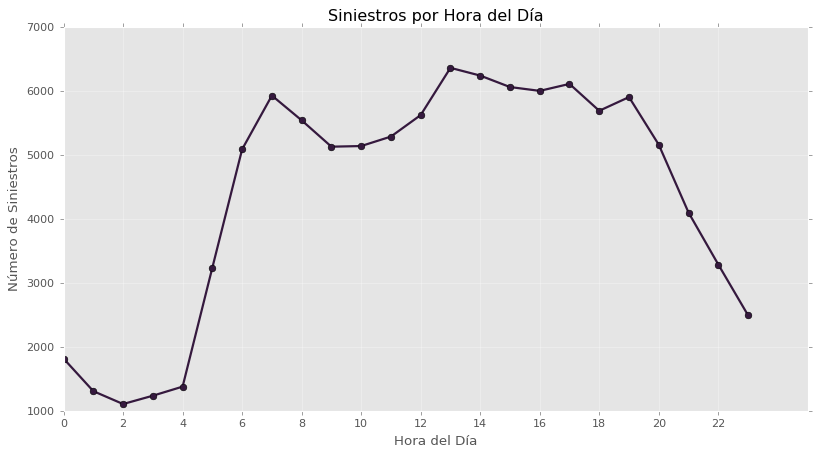


ESTADÍSTICAS PRINCIPALES:
Año con más siniestros: 2021 (28855 siniestros)
Mes con más siniestros: Marzo (9726 siniestros)
Día con más siniestros: viernes (16891 siniestros)
Hora con más siniestros: 13:00 (6355 siniestros)
Total de siniestros analizados: 105094

ANÁLISIS DE GRAVEDAD


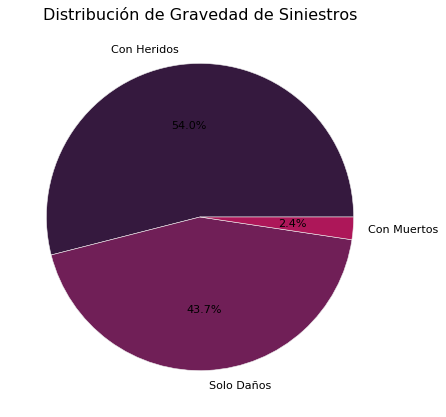

Con Heridos: 56728 siniestros (54.0%)
Solo Daños: 45879 siniestros (43.7%)
Con Muertos: 2487 siniestros (2.4%)

ANÁLISIS POR LOCALIDADES


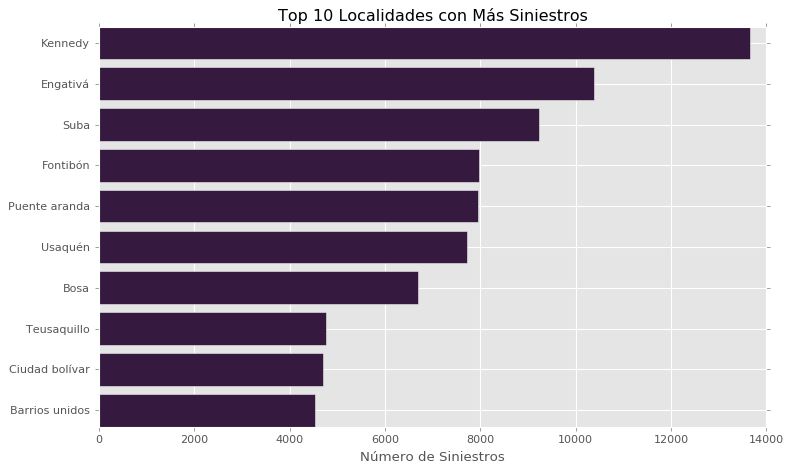

Top 5 localidades con más siniestros:
1. Kennedy: 13647 siniestros
2. Engativá: 10375 siniestros
3. Suba: 9221 siniestros
4. Fontibón: 7974 siniestros
5. Puente aranda: 7944 siniestros


In [22]:


# Configuración simple
plt.style.use('ggplot') #cambiar el estilo si se desea
sns.set_palette("rocket")

def analisis_temporal_simple(df_siniestros):
    """Análisis temporal básico para df_siniestros"""
    print("ANÁLISIS TEMPORAL DE SINIESTROS")
    print("=" * 40)
    
    # 1. GRÁFICO DE SINIESTROS POR AÑO
    plt.figure(figsize=(10, 6))
    siniestros_por_anio = df_siniestros['Año_Accidente'].value_counts().sort_index()
    plt.bar(siniestros_por_anio.index, siniestros_por_anio.values)
    plt.title('Siniestros por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Siniestros')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2. GRÁFICO DE SINIESTROS POR MES
    plt.figure(figsize=(12, 6))
    meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    siniestros_por_mes = df_siniestros['Mes_Accidente'].value_counts()
    siniestros_por_mes = siniestros_por_mes.reindex(meses_orden)
    
    plt.bar(siniestros_por_mes.index, siniestros_por_mes.values)
    plt.title('Siniestros por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Número de Siniestros')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 3. GRÁFICO DE SINIESTROS POR DÍA DE LA SEMANA
    plt.figure(figsize=(10, 6))
    dias_orden = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
    siniestros_por_dia = df_siniestros['Día_Semana_Accidente'].value_counts()
    siniestros_por_dia = siniestros_por_dia.reindex(dias_orden)
    
    plt.bar(siniestros_por_dia.index, siniestros_por_dia.values)
    plt.title('Siniestros por Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Número de Siniestros')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 4. GRÁFICO DE SINIESTROS POR HORA
    plt.figure(figsize=(12, 6))
    df_siniestros['Hora_Num'] = pd.to_numeric(df_siniestros['Hora_Accidente'], errors='coerce')
    siniestros_por_hora = df_siniestros['Hora_Num'].value_counts().sort_index()

    plt.plot(siniestros_por_hora.index, siniestros_por_hora.values, marker='o', linewidth=2)
    plt.title('Siniestros por Hora del Día')
    plt.xlabel('Hora del Día')
    plt.ylabel('Número de Siniestros')
    plt.xticks(range(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # MOSTRAR ESTADÍSTICAS
    print("\nESTADÍSTICAS PRINCIPALES:")
    print("=" * 30)
    
    # Año con más siniestros
    anio_max = siniestros_por_anio.idxmax()
    cantidad_anio = siniestros_por_anio.max()
    print(f"Año con más siniestros: {anio_max} ({cantidad_anio} siniestros)")
    
    # Mes con más siniestros
    mes_max = siniestros_por_mes.idxmax()
    cantidad_mes = siniestros_por_mes.max()
    print(f"Mes con más siniestros: {mes_max} ({cantidad_mes} siniestros)")
    
    # Día con más siniestros
    dia_max = siniestros_por_dia.idxmax()
    cantidad_dia = siniestros_por_dia.max()
    print(f"Día con más siniestros: {dia_max} ({cantidad_dia} siniestros)")
    
    # Hora con más siniestros
    hora_max = siniestros_por_hora.idxmax()
    cantidad_hora = siniestros_por_hora.max()
    print(f"Hora con más siniestros: {hora_max}:00 ({cantidad_hora} siniestros)")
    
    # Total de siniestros
    print(f"Total de siniestros analizados: {len(df_siniestros)}")

def analisis_gravedad_simple(df_siniestros):
    """Análisis básico de gravedad"""
    print("\nANÁLISIS DE GRAVEDAD")
    print("=" * 30)
    
    # Gráfico de gravedad
    plt.figure(figsize=(8, 6))
    gravedad = df_siniestros['Gravedad_Indicador_Tradicional'].value_counts()
    plt.pie(gravedad.values, labels=gravedad.index, autopct='%1.1f%%')
    plt.title('Distribución de Gravedad de Siniestros')
    plt.show()
    
    # Estadísticas de gravedad
    for tipo, cantidad in gravedad.items():
        porcentaje = (cantidad / len(df_siniestros)) * 100
        print(f"{tipo}: {cantidad} siniestros ({porcentaje:.1f}%)")

def analisis_localidades_simple(df_siniestros):
    """Análisis básico por localidades"""
    print("\nANÁLISIS POR LOCALIDADES")
    print("=" * 30)
    
    # Top 10 localidades con más siniestros
    localidades = df_siniestros['Localidad'].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    plt.barh(localidades.index[::-1], localidades.values[::-1])
    plt.title('Top 10 Localidades con Más Siniestros')
    plt.xlabel('Número de Siniestros')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 localidades con más siniestros:")
    for i, (localidad, cantidad) in enumerate(localidades.head().items(), 1):
        print(f"{i}. {localidad}: {cantidad} siniestros")

# EJECUTAR ANÁLISIS COMPLETO
print("INICIANDO ANÁLISIS DE SINIESTROS")
print("=" * 40)

# Ejecutar análisis temporal
analisis_temporal_simple(df_siniestros)

# Ejecutar análisis de gravedad
analisis_gravedad_simple(df_siniestros)

# Ejecutar análisis por localidades
analisis_localidades_simple(df_siniestros)


# Crear un resumen simple
resumen = {
    'Tipo de Análisis': [
        'Total de siniestros',
        'Año con más siniestros', 
        'Mes con más siniestros',
        'Día con más siniestros',
        'Hora con más siniestros',
        'Localidad con más siniestros',
        'Tipo de gravedad más común'
    ],
    'Resultado': [
        len(df_siniestros),
        df_siniestros['Año_Accidente'].value_counts().idxmax(),
        df_siniestros['Mes_Accidente'].value_counts().idxmax(),
        df_siniestros['Día_Semana_Accidente'].value_counts().idxmax(),
        f"{df_siniestros['Hora_Accidente'].value_counts().idxmax()}:00",
        df_siniestros['Localidad'].value_counts().idxmax(),
        df_siniestros['Gravedad_Indicador_Tradicional'].value_counts().idxmax()
    ]
}


